In [1]:
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats

In [31]:
#choosing holidays to keep
def AB_test(dataframe, group, target):

    #splitting groups
    groupA=dataframe[dataframe[group]==1][target] #holiday
    groupB=dataframe[dataframe[group]==0][target] #not holiday

    #checking distributin of groups using shapiro 
    #H0: distribution is normal
    # pA=shapiro(groupA)[1]
    # pB=shapiro(groupB)[1]

    # if (pA >=0.05) & (pB>=0.05):
        #both are normally distributed so we use parametric test

    #checking homogeneity of variances using levene test
    #H0: there is homogeneity of variances
    leveneTest_p = stats.levene(groupA, groupB)[1]

    if leveneTest_p<0.05:
        #heterogeneous

        #t test
        #H0: M1 == M2
        p=stats.ttest_ind(groupA, groupB, equal_var=False)[1]
    else:
        #homogeneity

        #ttest
        #H0:M1==M2
        p=stats.ttest_ind(groupA, groupB, equal_var=True)[1]
    # else:
    #     #non-parametric test

    #     #Mann-Whitney U test
    #     # H0: M1 == M2
    #     p=stats.mannwhitneyu(groupA, groupB)[1]

    group = [group]
    p = [p]
    # pA = [pA]
    # pB = [pB]

    AB = pd.DataFrame({
    "Feature": group,
    "p-value": p,
    #"Test": np.where((np.array(pA) == False) & (np.array(pB) == False), "t-Test (p)", "Mann-Whitney U (nonp)"),
    "Hypothesis": np.where(np.array(p) >= 0.05, "Fail to Reject H0", "Reject H0"),
    "Comment": np.where(np.array(p) >= 0.05, "A/B groups are similar", "A/B groups are not similar"),
    "GroupA_mean": np.mean(groupA),
    "GroupB_mean": np.mean(groupB),
    "GroupA_median": np.median(groupA),
    "GroupB_median": np.median(groupB)
    })
    return AB

In [3]:
df=pd.read_csv(r'novi_datasetovi\train_test_v1.csv', parse_dates=['date'])
df=df.drop(columns='Unnamed: 0')
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,work_day,...,N Futbol,N Independencia de Cuenca,N Independencia de Guayaquil,N Navidad,N Primer Grito de Independencia,N Primer dia del ano,N Terremoto Manabi,N Viernes Santo,oil_price,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,0,...,0,0,0,0,0,1,0,0,93.14,0.0
1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,0,...,0,0,0,0,0,1,0,0,93.14,0.0
2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,0,...,0,0,0,0,0,1,0,0,93.14,0.0
3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,0,...,0,0,0,0,0,1,0,0,93.14,0.0
4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,0,...,0,0,0,0,0,1,0,0,93.14,0.0


In [17]:
train=df[df['date']<'2017-08-16']
test=df[df['date']>= '2017-08-16']

In [32]:
#A/B Testing

cols = train.columns[train.columns.str.startswith("N ")].tolist() + train.columns[train.columns.str.startswith("R ")].tolist() + train.columns[train.columns.str.startswith("L ")].tolist()+ train.columns[train.columns.str.startswith("work_day")].tolist()
ab = []
for i in cols:
    ab.append(AB_test(dataframe=train, group = i, target = "sales"))
ab = pd.concat(ab)
ab

,Feature,p-value,Hypothesis,Comment,GroupA_mean,GroupB_mean,GroupA_median,GroupB_median
0,N Batalla de Pichincha,5.181154e-03,Reject H0,A/B groups are not similar,391.726745,356.824556,12.0,11.0
0,N Black Friday,6.689129e-01,Fail to Reject H0,A/B groups are similar,363.360708,356.916486,17.0,11.0
0,N Carnaval,2.323565e-03,Reject H0,A/B groups are not similar,332.882573,357.071237,10.0,11.0
0,N Cyber Monday,4.249429e-06,Reject H0,A/B groups are not similar,436.220250,356.786766,17.0,11.0
0,N Dia de Difuntos,6.682849e-08,Reject H0,A/B groups are not similar,431.034644,356.707777,16.0,11.0
0,N Dia de la Madre,4.930530e-06,Reject H0,A/B groups are not similar,397.836026,356.684149,13.0,11.0
0,N Dia del Trabajo,4.023208e-14,Reject H0,A/B groups are not similar,481.446180,356.558010,13.0,11.0
0,N Futbol,1.659731e-14,Reject H0,A/B groups are not similar,310.965144,357.312335,5.0,11.0
0,N Independencia de Cuenca,4.611872e-12,Reject H0,A/B groups are not similar,477.446607,356.641672,13.0,11.0
0,N Independencia de Guayaquil,2.608445e-06,Reject H0,A/B groups are not similar,430.354990,356.753528,16.0,11.0


In [42]:
#stores don't work on new years (except store 25,36) and christmass
train[(((train['date'].dt.month == 12) & (train['date'].dt.day == 25))| ((train['date'].dt.month == 1) & (train['date'].dt.day == 1) & (~(train['store_nbr'].isin([25,36]))))) & (train['sales']!=0)]

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,work_day,...,N Futbol,N Independencia de Cuenca,N Independencia de Guayaquil,N Navidad,N Primer Grito de Independencia,N Primer dia del ano,N Terremoto Manabi,N Viernes Santo,oil_price,transactions


In [ ]:
#sales on those days are going to be zero, but we are going to insert lin interpolated values for better estimations of following days

C:\Users\Snezana\AppData\Local\Temp\ipykernel_13020\1109188079.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['N Black Friday']==1]['sales'])


<Axes: xlabel='sales', ylabel='Density'>

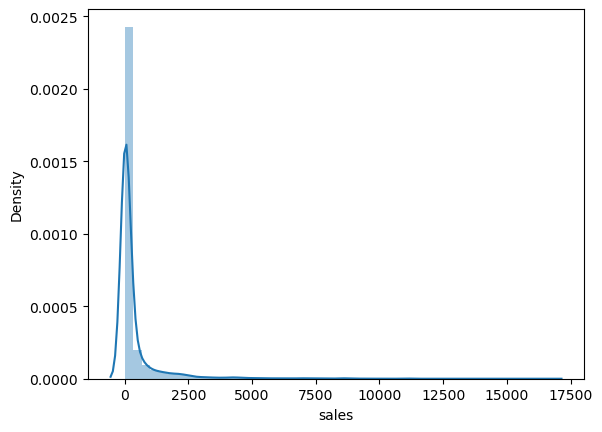

In [44]:
import seaborn as sns

sns.distplot(train[train['N Black Friday']==1]['sales'])

In [45]:
len(train[train['N Black Friday']==1]['sales'])

5346